<a href="https://colab.research.google.com/github/YeiferKmac/MetodosComputacionales2-G02/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray

def datos_prueba(t_max:float, dt:float, amplitudes:NDArray[float],
  frecuencias:NDArray[float], ruido:float=0.0) -> NDArray[float]:
  ts = np.arange(0.,t_max,dt)
  ys = np.zeros_like(ts,dtype=float)
  for A,f in zip(amplitudes,frecuencias):
    ys += A*np.sin(2*np.pi*f*ts)
    ys += np.random.normal(loc=0,size=len(ys),scale=ruido) if ruido else 100
  return ts,ys


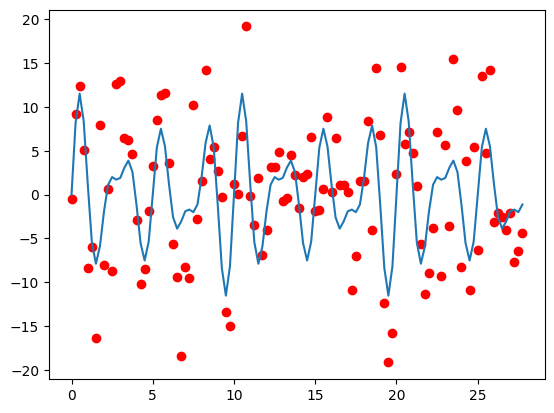

In [3]:
t1,y1 = datos_prueba(28,0.25,[2,4,6],[0.5,0.6,0.4],ruido=4)
t2,y2 = datos_prueba(28,0.25,[2,4,6],[0.5,0.6,0.4])
y2=y2-300
plt.scatter(t1,y1,color="r")
plt.plot(t2,y2)


In [6]:
def Fourier(t:NDArray[float], y:NDArray[float],
 f:NDArray[float]) -> NDArray[complex]:
    N = len(y)
    result = np.zeros(len(f), dtype=complex)
    for k in range(N):
        result += y[k]*np.exp(-2j * np.pi * t[k] * f)
    return result

In [7]:
# Definimos las frecuencias a analizar
frecuencias_analisis = [0.5,0.6,0.4]
# Transformada de Fourier de las señales
ft_sin_ruido = Fourier(t2, y2, frecuencias_analisis)
ft_con_ruido = Fourier(t1, y1, frecuencias_analisis)

TypeError: can't multiply sequence by non-int of type 'complex'